In [1]:
#allow output from every line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing packages
import pandas as pd
import numpy as np
from pybaseball import lahman
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns
from pybaseball import statcast

In [51]:
#indexed_df is all statcast data from 2023
## trimmed_data23 = data23[['pitch_type', 'player_name', 'description', 'release_speed']]
### indexed_df is indexed by player name
indexed_df = pd.read_csv("FinalData/indexed_df.csv")
indexed_df.head(10) #displayed below
player = indexed_df.player_name
pitches = indexed_df.pitch_type
pd.unique(pitches) #displayed below
#separated breaking pitches and other pitches based on information from Daktronics and MLB.com
## link for Daktronics https://www.daktronics.com/en-us/support/kb/DD3312647
### link for MLB.com https://www.mlb.com/glossary/pitch-types
breaking_pitches_bool = np.in1d(pitches,["CU","SL","KN","KC","ST","FO","SC","CS","SV"])
other_pitches_bool = np.in1d(pitches,["FF","CH","EP","FA","FC","SI"])
unique_pitchers = np.unique(player)
breaking = indexed_df[breaking_pitches_bool]
others = indexed_df[other_pitches_bool]
breaking_pitchers = player[breaking_pitches_bool]
other_pitchers = player[other_pitches_bool]
player = indexed_df.player_name
unique_pitchers = np.unique(player)
breaking_pitchers = player[breaking_pitches_bool]
other_pitchers = player[other_pitches_bool]

,player_name,pitch_type,description,release_speed
0,"Sborz, Josh",CU,called_strike,84.9
1,"Sborz, Josh",FF,ball,96.6
2,"Sborz, Josh",CU,called_strike,84.5
3,"Sborz, Josh",FF,foul,95.4
4,"Sborz, Josh",FF,ball,95.6
5,"Sborz, Josh",FF,hit_into_play,95.6
6,"Sborz, Josh",CU,ball,83.9
7,"Sborz, Josh",CU,called_strike,86.3
8,"Sborz, Josh",FF,foul,96.3
9,"Sborz, Josh",CU,ball,85.6


array(['CU', 'FF', 'ST', 'SL', 'SI', 'KC', 'CH', 'FC', 'FS', 'PO', 'SV',
       'KN', 'EP', 'FA', 'FO', 'CS', nan, 'SC'], dtype=object)

In [52]:
#Finding the 10 players who threw the most pitches in 2023
player_name_counts = indexed_df['player_name'].value_counts()
top_ten_pitch_throwers = player_name_counts.head(10)
top_ten_pitch_throwers
#Finding the 10 players who threw the most strikes in 2023
new_non_contact_strikes = indexed_df[indexed_df['description'].isin(["called_strike", "swinging_strike"])]
strike_player_name_counts = new_non_contact_strikes['player_name'].value_counts()
top_ten_strike_throwers = strike_player_name_counts.head(10)
top_ten_strike_throwers

player_name
Gallen, Zac           3795
Wheeler, Zack         3557
Nola, Aaron           3431
Montgomery, Jordan    3380
Strider, Spencer      3290
Cole, Gerrit          3281
Cease, Dylan          3262
López, Pablo          3222
Lynn, Lance           3215
Castillo, Luis        3207
Name: count, dtype: int64

player_name
Strider, Spencer    1082
Gallen, Zac         1011
Nola, Aaron         1000
Wheeler, Zack        982
López, Pablo         932
Webb, Logan          926
Castillo, Luis       921
Gausman, Kevin       914
Cease, Dylan         905
Cole, Gerrit         900
Name: count, dtype: int64

In [53]:
#converting above to DF
total_counts_df = pd.DataFrame(player_name_counts)
total_counts_df.columns = ['total_pitches']
strike_counts_df = pd.DataFrame(strike_player_name_counts)
strike_counts_df.columns = ['total_strikes']
#using an outer join to merge the two
merged_counts = pd.merge(total_counts_df, strike_counts_df, on='player_name', how='outer')
merged_counts = merged_counts.fillna(0)
merged_counts

,total_pitches,total_strikes
player_name,,
"Gallen, Zac",3795,1011.0
"Wheeler, Zack",3557,982.0
"Nola, Aaron",3431,1000.0
"Montgomery, Jordan",3380,875.0
"Strider, Spencer",3290,1082.0
...,...,...
"Phillips, Brett",7,0.0
"Danner, Hagen",7,2.0
"Williams, Luke",6,0.0


In [54]:
#merging data using left joins
merged_breaking = pd.merge(strike_counts_df, breaking, on='player_name', how='left')
merged_others = pd.merge(strike_counts_df, others, on='player_name', how='left')
merged_breaking = merged_breaking.fillna(0)
merged_others = merged_others.fillna(0)
#filtering for strikes (non-contact)
filtered_merged_breaking = merged_breaking[(merged_breaking['description'] == 'called_strike') | (merged_breaking['description'] == 'swinging_strike')]
filtered_merged_others = merged_others[(merged_others['description'] == 'called_strike') | (merged_others['description'] == 'swinging_strike')]
filtered_merged_breaking #displaying
filtered_merged_others #displaying

,player_name,total_strikes,pitch_type,description,release_speed
2,"Strider, Spencer",1082,SL,swinging_strike,87.3
3,"Strider, Spencer",1082,SL,called_strike,87.3
4,"Strider, Spencer",1082,SL,called_strike,86.6
6,"Strider, Spencer",1082,SL,swinging_strike,87.3
12,"Strider, Spencer",1082,SL,called_strike,84.8
...,...,...,...,...,...
228325,"Karcher, Ricky",3,SL,called_strike,87.6
228327,"Karcher, Ricky",3,SL,called_strike,88.5
228331,"Karcher, Ricky",3,SL,called_strike,88.2
228353,"Ryan, Ryder",2,SL,called_strike,85.3


,player_name,total_strikes,pitch_type,description,release_speed
2,"Strider, Spencer",1082,FF,swinging_strike,98.6
5,"Strider, Spencer",1082,FF,swinging_strike,99.0
6,"Strider, Spencer",1082,FF,swinging_strike,98.6
7,"Strider, Spencer",1082,CH,swinging_strike,87.5
12,"Strider, Spencer",1082,FF,swinging_strike,98.2
...,...,...,...,...,...
485077,"Hernández, Yonny",1,FA,called_strike,76.6
485088,"León, Sandy",1,FA,called_strike,78.8
485105,"Claudio, Alex",1,SI,called_strike,84.3
485108,"Lamb, Jake",1,EP,called_strike,59.3


In [57]:
#creating data frames by counting values of breaking pitches and other pitches
breaking_strike_counts = filtered_merged_breaking['player_name'].value_counts()
breaking_strike_counts_df = pd.DataFrame(breaking_strike_counts)
breaking_strike_counts_df #displaying

other_strike_counts = filtered_merged_others['player_name'].value_counts()
other_strike_counts_df = pd.DataFrame(other_strike_counts)
other_strike_counts_df #displaying

,count
player_name,
"Cease, Dylan",499
"Oviedo, Johan",452
"Strider, Spencer",425
"Morton, Charlie",423
"Schmidt, Clarke",407
...,...
"Quijada, José",1
"Woods Richardson, Simeon",1
"Reyes, Pablo",1


,count
player_name,
"Gallen, Zac",768
"Wheeler, Zack",759
"Lynn, Lance",757
"Webb, Logan",719
"Kelly, Merrill",703
...,...
"Hernández, Yonny",1
"León, Sandy",1
"Claudio, Alex",1


In [59]:
#renaming columns for easier merges
breaking_strike_counts_df = breaking_strike_counts_df.rename(columns={'count': 'breaking_strikes'})
other_strike_counts_df = other_strike_counts_df.rename(columns={'count': 'non-breaking_strikes'})
breaking_strike_counts_df #displaying
other_strike_counts_df #displaying

,breaking_strikes
player_name,
"Cease, Dylan",499
"Oviedo, Johan",452
"Strider, Spencer",425
"Morton, Charlie",423
"Schmidt, Clarke",407
...,...
"Quijada, José",1
"Woods Richardson, Simeon",1
"Reyes, Pablo",1


,non-breaking_strikes
player_name,
"Gallen, Zac",768
"Wheeler, Zack",759
"Lynn, Lance",757
"Webb, Logan",719
"Kelly, Merrill",703
...,...
"Hernández, Yonny",1
"León, Sandy",1
"Claudio, Alex",1


In [78]:
#outer joining the two data frames
breaking_others_counts = pd.merge(breaking_strike_counts_df, other_strike_counts_df, on='player_name', how='outer')
breaking_others_counts = breaking_others_counts.fillna(0)
breaking_others_counts['total_strikes'] = breaking_others_counts['breaking_strikes'] + breaking_others_counts['non-breaking_strikes']
breaking_others_counts = breaking_others_counts.sort_values('total_strikes', ascending=False)
top_50_strike_throwers = breaking_others_counts.head(50)
top_50_strike_throwers['breaking_to_total_strike%'] = ((top_50_strike_throwers['breaking_strikes'] / top_50_strike_throwers['total_strikes']) * 100) 
top_50_strike_throwers = top_50_strike_throwers.sort_values('breaking_to_total_strike%', ascending=False)
top_50_strike_throwers #displaying
breaking_others_counts #displaying

/var/folders/yz/zr_x9gps0llfhtf29_ssmm1m0000gq/T/ipykernel_4459/2255970067.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_strike_throwers['breaking_to_total_strike%'] = ((top_50_strike_throwers['breaking_strikes'] / top_50_strike_throwers['total_strikes']) * 100)


,breaking_strikes,non-breaking_strikes,total_strikes,breaking_to_total_strike%
player_name,,,,
"Oviedo, Johan",452.0,312.0,764.0,59.162304
"Detmers, Reid",389.0,304.0,693.0,56.132756
"Cease, Dylan",499.0,406.0,905.0,55.138122
"Schmidt, Clarke",407.0,353.0,760.0,53.552632
"Gray, Josiah",381.0,338.0,719.0,52.990264
"Verlander, Justin",370.0,353.0,723.0,51.175657
"Morton, Charlie",423.0,430.0,853.0,49.589683
"Kikuchi, Yusei",373.0,395.0,768.0,48.567708
"Bradish, Kyle",370.0,396.0,766.0,48.302872


,breaking_strikes,non-breaking_strikes,total_strikes
player_name,,,
"Strider, Spencer",425.0,657.0,1082.0
"Gallen, Zac",243.0,768.0,1011.0
"Nola, Aaron",330.0,670.0,1000.0
"Wheeler, Zack",223.0,759.0,982.0
"López, Pablo",296.0,636.0,932.0
...,...,...,...
"Hernández, Yonny",0.0,1.0,1.0
"León, Sandy",0.0,1.0,1.0
"Claudio, Alex",0.0,1.0,1.0


In [153]:
total_pitches = merged_counts['total_pitches']
total_pitches_df = pd.DataFrame(total_pitches)
#joining total pitches into main df
totals_merged_counts = pd.merge(breaking_others_counts, total_pitches_df, left_index=True, right_index=True, how='outer')
totals_merged_counts = totals_merged_counts.sort_values('total_pitches', ascending=False)
totals_merged_counts['breaking_to_total_strike%'] = ((totals_merged_counts['breaking_strikes'] / totals_merged_counts['total_strikes']) * 100)
totals_merged_counts['strike_to_pitch%'] = ((totals_merged_counts['total_strikes'] / totals_merged_counts['total_pitches']) * 100)
#finding mean MPH for pitchers
df_with_mph = indexed_df[['player_name', 'release_speed']]
mean_mph_by_pitcher = df_with_mph.groupby('player_name')['release_speed'].mean().reset_index()
mean_mph_by_pitcher = mean_mph_by_pitcher.sort_values('release_speed', ascending=False)

#joining mean MPH with main df
total_data = pd.merge(totals_merged_counts, mean_mph_by_pitcher, on='player_name', how='outer')
#displaying top 50 pitch throwers from 2023
top_50 = total_data.head(50)
top_50 #displaying
#storing as csv for easier future use
top_50.to_csv("FinalData/top_50.csv")

,player_name,breaking_strikes,non-breaking_strikes,total_strikes,total_pitches,breaking_to_total_strike%,strike_to_pitch%,release_speed
0,"Gallen, Zac",243.0,768.0,1011.0,3795,24.035608,26.640316,89.535810
1,"Wheeler, Zack",223.0,759.0,982.0,3557,22.708758,27.607534,91.889008
2,"Nola, Aaron",330.0,670.0,1000.0,3431,33.000000,29.146022,87.036054
3,"Montgomery, Jordan",209.0,666.0,875.0,3380,23.885714,25.887574,88.046479
4,"Strider, Spencer",425.0,657.0,1082.0,3290,39.279113,32.887538,92.626018
5,"Cole, Gerrit",294.0,606.0,900.0,3281,32.666667,27.430661,92.616885
6,"Cease, Dylan",499.0,406.0,905.0,3262,55.138122,27.743716,89.003188
7,"López, Pablo",296.0,636.0,932.0,3222,31.759657,28.926133,89.804562
8,"Lynn, Lance",88.0,757.0,845.0,3215,10.414201,26.283048,89.471073
9,"Castillo, Luis",251.0,670.0,921.0,3207,27.252986,28.718428,92.611787


In [95]:
#data consistent with previous data, detailing that neither break nor speed can consistently predict
##strikes for ALL pitchers

<IPython.core.display.Javascript object>


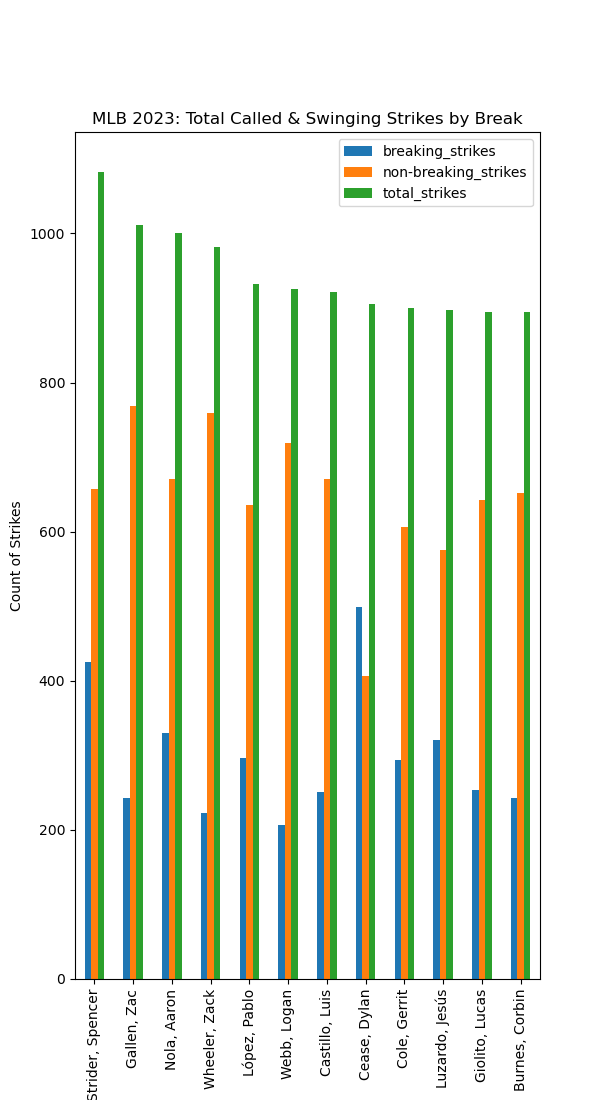

Text(0.5, 0, 'pitcher')

Text(0, 0.5, 'Count of Strikes')

Text(0.5, 1.0, 'MLB 2023: Total Called & Swinging Strikes by Break')

In [227]:
ax1 = fig.add_subplot(1, 1, 1)
ax1 = breaking_others_counts.head(12).plot.bar(figsize=(6, 11))
ax1.set_xlabel('pitcher')
ax1.set_ylabel('Count of Strikes')
ax1.set_title("MLB 2023: Total Called & Swinging Strikes by Break")
fig.savefig("FinalData/vis2.pdf")

<IPython.core.display.Javascript object>


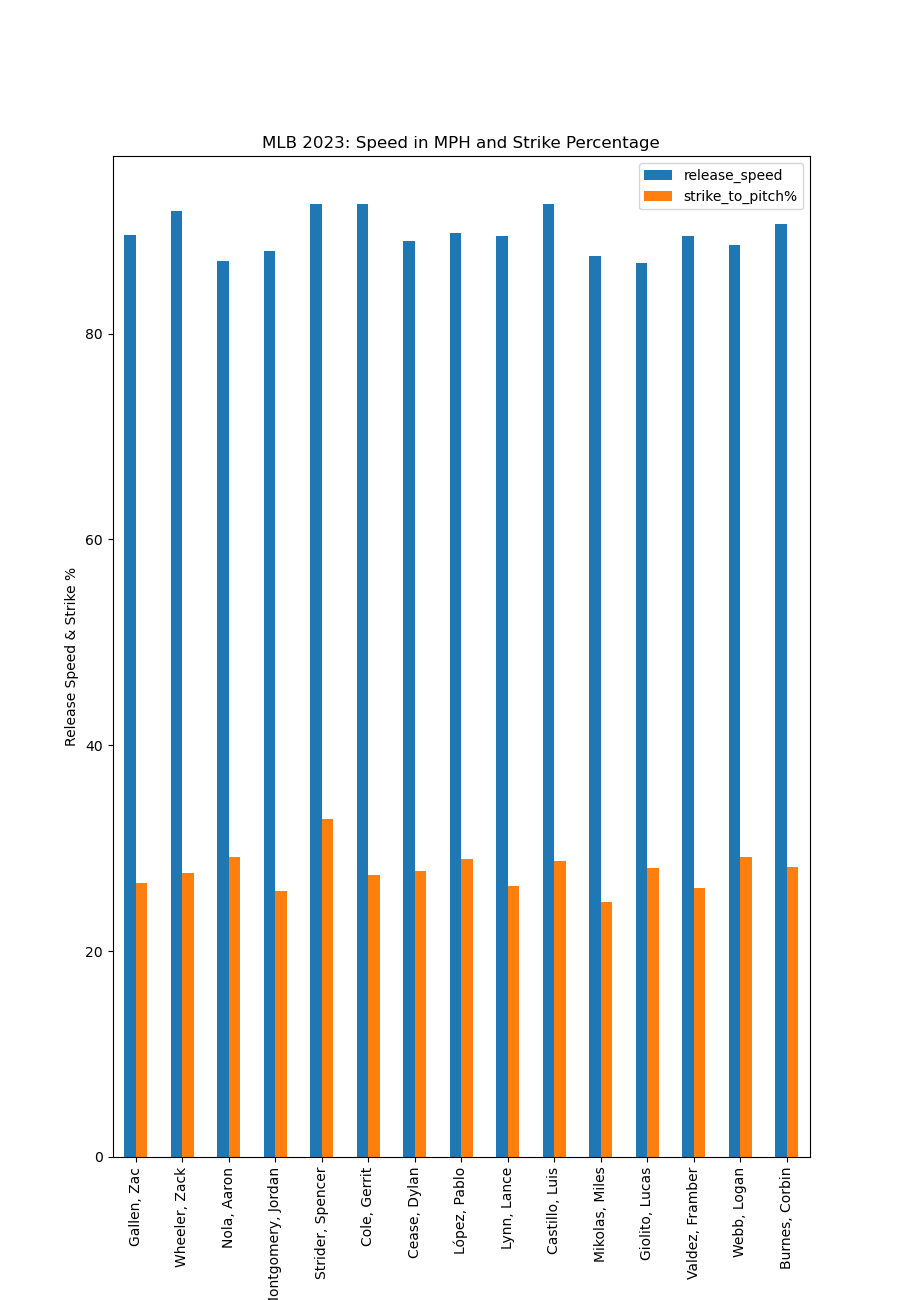

Text(0.5, 0, 'pitcher')

Text(0, 0.5, 'Release Speed & Strike %')

Text(0.5, 1.0, 'MLB 2023: Speed in MPH and Strike Percentage')

In [226]:
ax = total_data[['release_speed', 'strike_to_pitch%', 'player_name']].set_index('player_name').head(15).plot.bar(figsize=(9, 13))
ax.set_xlabel('pitcher')
ax.set_ylabel('Release Speed & Strike %')
ax.set_title("MLB 2023: Speed in MPH and Strike Percentage")
fig.savefig("FinalData/vis3.pdf")

,player_name,breaking_strikes,non-breaking_strikes,total_strikes,total_pitches,breaking_to_total_strike%,strike_to_pitch%,release_speed
5,"Cole, Gerrit",294.0,606.0,900.0,3281,32.666667,27.430661,92.616885


,player_name,breaking_strikes,non-breaking_strikes,total_strikes,total_pitches,breaking_to_total_strike%,strike_to_pitch%,release_speed
15,"Snell, Blake",240.0,640.0,880.0,3168,27.272727,27.777778,90.078725


<IPython.core.display.Javascript object>


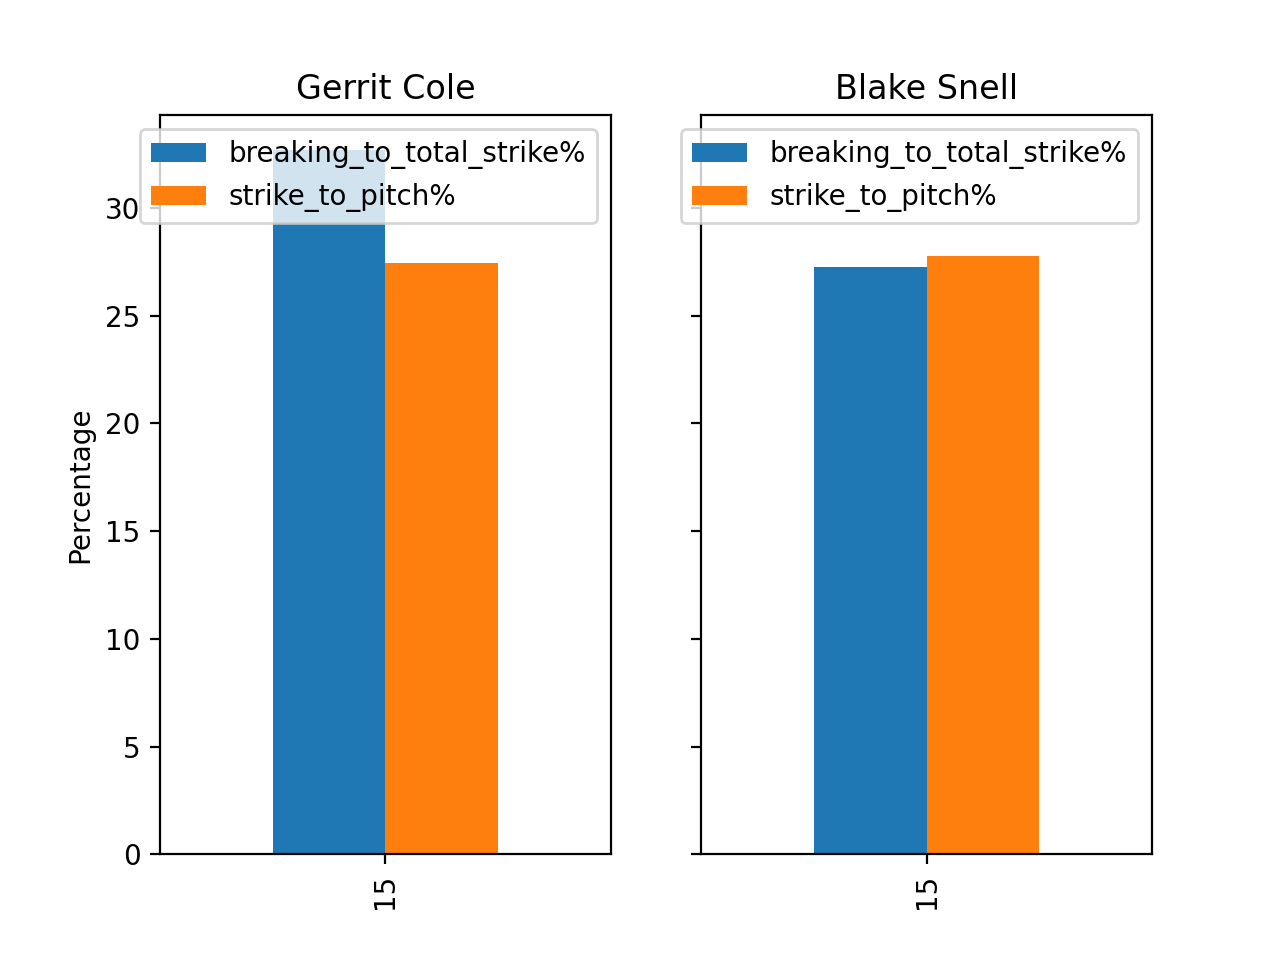

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Gerrit Cole')

Text(0.5, 1.0, 'Blake Snell')

Text(0, 0.5, 'Percentage')

Text(0, 0.5, 'Percentage')

In [171]:
#creating visualizations for two cy young winners
selected_pitcher_cole = ['Cole, Gerrit']
cole_filter = top_50['player_name'].isin(selected_pitcher_cole)
cole_df = top_50[cole_filter]
cole_df
selected_pitcher_snell = ['Snell, Blake']
snell_filter = top_50['player_name'].isin(selected_pitcher_snell)
snell_df = top_50[snell_filter]
snell_df

#visualize
fig, axes = plt.subplots(1,2,sharex = True, sharey = True)
cole_df[['breaking_to_total_strike%','strike_to_pitch%']].plot.bar(ax=axes[0])
snell_df[['breaking_to_total_strike%','strike_to_pitch%']].plot.bar(ax=axes[1])
axes[0].set_title('Gerrit Cole')
axes[1].set_title('Blake Snell')
axes[0].set_ylabel('Percentage')
axes[1].set_ylabel('Percentage')
fig.savefig("FinalData/CyYoungViz.pdf")

In [172]:
#The two best pitchers in the league don't show enough correlation between breaking pitches as a percentage of strikes
## To show significance

In [194]:
#Whiff rates & Adding whiffs and whiff rate to the data frame
#defining whiffs (swing and misses) with boolean filter
swinging_strike = ['swinging_strike']
swing_filter = indexed_df['description'].isin(swinging_strike)
swinging_strike_df = indexed_df[swing_filter]
whiff_counts = swinging_strike_df['player_name'].value_counts()
#creating df of player_name and whiffs
whiff_counts_df = pd.DataFrame(whiff_counts)
#changing name to whiffs for easier merge
whiff_counts_df = whiff_counts_df.rename(columns={'count': 'whiffs'})
#ensuring proper indexing to merge data
total_data_new = total_data.set_index('player_name')
#merging whiffs and creating whiff rate
total_data_new = pd.merge(total_data_new, whiff_counts_df, left_index=True, right_index=True, how='left')
total_data_new['whiff_rate'] = ((total_data_new['whiffs'] / total_data_new['total_pitches']) * 100)
top_50_with_whiffs = total_data_new.head(50)
top_50_with_whiffs

,breaking_strikes,non-breaking_strikes,total_strikes,total_pitches,breaking_to_total_strike%,strike_to_pitch%,release_speed,whiffs,whiff_rate
player_name,,,,,,,,,
"Gallen, Zac",243.0,768.0,1011.0,3795,24.035608,26.640316,89.535810,359.0,9.459816
"Wheeler, Zack",223.0,759.0,982.0,3557,22.708758,27.607534,91.889008,469.0,13.185268
"Nola, Aaron",330.0,670.0,1000.0,3431,33.000000,29.146022,87.036054,386.0,11.250364
"Montgomery, Jordan",209.0,666.0,875.0,3380,23.885714,25.887574,88.046479,324.0,9.585799
"Strider, Spencer",425.0,657.0,1082.0,3290,39.279113,32.887538,92.626018,595.0,18.085106
"Cole, Gerrit",294.0,606.0,900.0,3281,32.666667,27.430661,92.616885,375.0,11.429442
"Cease, Dylan",499.0,406.0,905.0,3262,55.138122,27.743716,89.003188,399.0,12.231760
"López, Pablo",296.0,636.0,932.0,3222,31.759657,28.926133,89.804562,422.0,13.097455
"Lynn, Lance",88.0,757.0,845.0,3215,10.414201,26.283048,89.471073,406.0,12.628305


In [197]:
#highlighting spencer strider's 18% whiff rate!
##Just under 1 in 5 pitches are swings and misses
strider = top_50_with_whiffs.sort_values('whiff_rate', ascending=False)
strider.head(10)

,breaking_strikes,non-breaking_strikes,total_strikes,total_pitches,breaking_to_total_strike%,strike_to_pitch%,release_speed,whiffs,whiff_rate
player_name,,,,,,,,,
"Strider, Spencer",425.0,657.0,1082.0,3290,39.279113,32.887538,92.626018,595.0,18.085106
"Castillo, Luis",251.0,670.0,921.0,3207,27.252986,28.718428,92.611787,458.0,14.281260
"Ryan, Joe",112.0,479.0,591.0,2709,18.950931,21.816168,88.125323,368.0,13.584348
"Luzardo, Jesús",321.0,576.0,897.0,3078,35.785953,29.142300,91.556270,418.0,13.580247
"Peralta, Freddy",317.0,526.0,843.0,2924,37.603796,28.830369,88.825274,397.0,13.577291
"Wheeler, Zack",223.0,759.0,982.0,3557,22.708758,27.607534,91.889008,469.0,13.185268
"López, Pablo",296.0,636.0,932.0,3222,31.759657,28.926133,89.804562,422.0,13.097455
"Lynn, Lance",88.0,757.0,845.0,3215,10.414201,26.283048,89.471073,406.0,12.628305
"Gausman, Kevin",109.0,493.0,602.0,3142,18.106312,19.159771,90.272470,387.0,12.316996


In [212]:
#Individual pitch with highest whiff rate
indexed_df = pd.read_csv("FinalData/indexed_df.csv")

#finding totals for each pitch thrown by pitcher
new_grouped_df = indexed_df.groupby(['player_name', 'pitch_type']).size().reset_index(name='count')
most_thrown_pitches = new_grouped_df.sort_values('count', ascending=False)
most_thrown_pitches

#filtering for only swinging_strikes
swing_and_miss = indexed_df[indexed_df['description'].isin(["swinging_strike"])]
grouped_df = swing_and_miss.groupby(['player_name', 'pitch_type']).size().reset_index(name='count')
best_pitches = grouped_df.sort_values('count', ascending=False)
best_pitches = best_pitches.rename(columns={'count': 'swing_and_misses'})
top_20_best_pitches = best_pitches.head(20)
top_20_best_pitches

,player_name,pitch_type,count
3006,"Strider, Spencer",FF,1945
1023,"Gallen, Zac",FF,1837
1489,"Javier, Cristian",FF,1797
417,"Burnes, Corbin",FC,1759
578,"Cole, Gerrit",FF,1739
...,...,...,...
2503,"Pérez, Carlos",EP,1
2191,"Morris, Cody",PO,1
562,"Clemens, Kody",FA,1
556,"Claudio, Alex",CH,1


,player_name,pitch_type,swing_and_misses
2577,"Strider, Spencer",SL,284
2576,"Strider, Spencer",FF,268
2310,"Ryan, Joe",FF,237
930,"Gausman, Kevin",FS,233
422,"Castillo, Luis",FF,233
2904,"Wheeler, Zack",FF,232
435,"Cease, Dylan",SL,227
1289,"Javier, Cristian",FF,222
1882,"Morton, Charlie",CU,200
1615,"Lynn, Lance",FF,197


In [222]:
#merging df's to find highest whiff rate
new_merged_df = pd.merge(most_thrown_pitches, top_20_best_pitches, on=['player_name', 'pitch_type'], how='left')
individual_pitch_df = new_merged_df.fillna(0).sort_values('swing_and_misses', ascending=False)
individual_pitch_df['individual_whiff_rate'] = ((individual_pitch_df['swing_and_misses'] / individual_pitch_df['count']) * 100)
best_10 = individual_pitch_df.sort_values('individual_whiff_rate', ascending=False).head(10)
best_10
#Spencer Strider's slider delivers a swing and miss 1 in 4 times!

,player_name,pitch_type,count,swing_and_misses,individual_whiff_rate
50,"Strider, Spencer",SL,1107,284.0,25.654923
90,"Luzardo, Jesús",SL,898,183.0,20.378619
92,"Kershaw, Clayton",SL,893,178.0,19.932811
38,"Gausman, Kevin",FS,1209,233.0,19.272126
29,"Cease, Dylan",SL,1260,227.0,18.015873
17,"Castillo, Luis",FF,1423,233.0,16.373858
33,"Morton, Charlie",CU,1228,200.0,16.286645
53,"Singer, Brady",SL,1098,177.0,16.120219
57,"Nola, Aaron",KC,1083,169.0,15.604801
10,"Ryan, Joe",FF,1540,237.0,15.389610
